<a href="https://colab.research.google.com/github/Buchunwang/UK-CLI/blob/main/Hamilton_(1989)_basic_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-e8677b0fd017>:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data = pd.read_csv(url, header=None, squeeze=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                        Markov Switching Model Results                        
Dep. Variable:               delta_ct   No. Observations:                  421
Model:               MarkovRegression   Log Likelihood                -314.222
Date:                Tue, 09 May 2023   AIC                            636.444
Time:                        22:33:10   BIC                            652.614
Sample:                    02-28-1986   HQIC                           642.834
                         - 02-28-2021                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.2046      0.017     11.832      0.000       0.171       0.238
                             Regime 1 parameters    

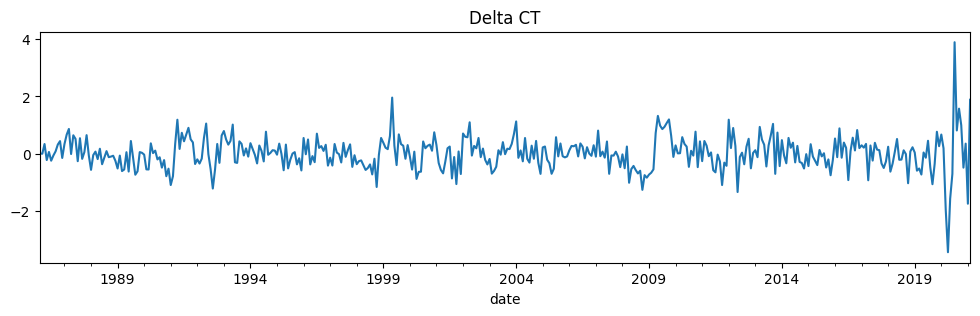

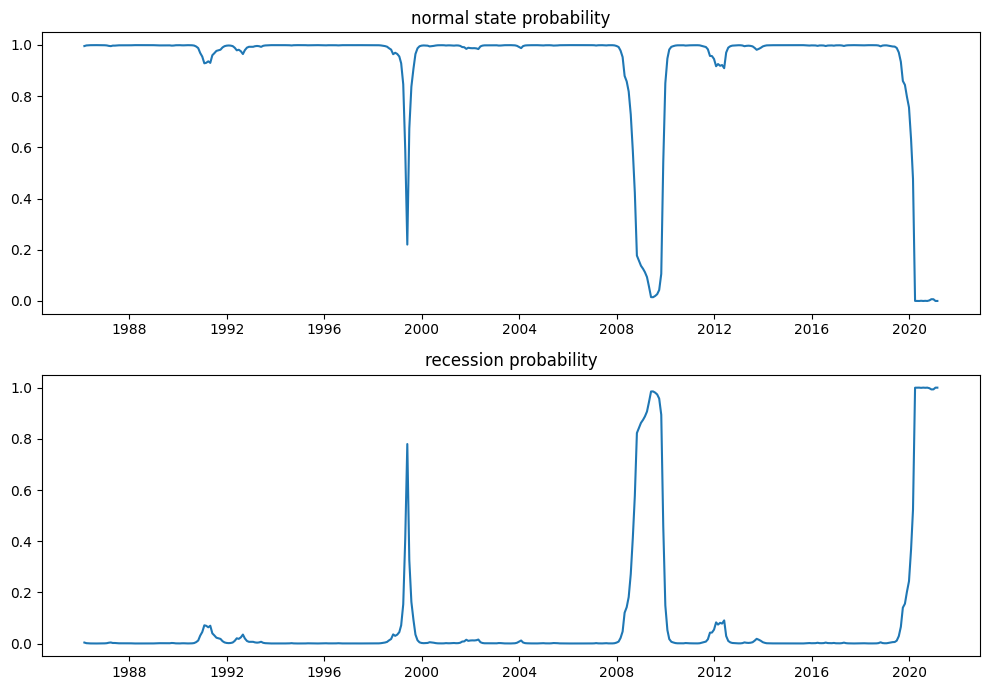

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import requests

# Load the new dataset
url = "https://raw.githubusercontent.com/Buchunwang/UK-CLI/main/Hamilton%20(1989)%20Basic%20filter/new_delta_ct%20.csv"
data = pd.read_csv(url, header=None, squeeze=True)

# Create date range
date_range = pd.date_range(start='1986-02', end='2021-03', freq='M')

# Create DataFrame with date range and data
df = pd.DataFrame({'date': date_range, 'delta_ct': data})
df.set_index('date', inplace=True)

# Plot the dataset
df['delta_ct'].plot(title="Delta CT", figsize=(12, 3))

# Fit the model
mod = sm.tsa.MarkovRegression(
    df['delta_ct'], k_regimes=2, trend="n", switching_variance=True
)
res = mod.fit()
print(res.summary())

fig, axes = plt.subplots(2, figsize=(10, 7))

ax = axes[0]
ax.plot(res.smoothed_marginal_probabilities[0])
ax.set(title="normal state probability")

ax = axes[1]
ax.plot(res.smoothed_marginal_probabilities[1])
ax.set(title="recession probability")

fig.tight_layout()

From above, everything should be done. But we also want to pay attention to those small increases in recession probability plot. They are comparatively mild recessions when compared with 2008 crisis, Brexit and Covid. They just look mild after the smoothing and optimization but weak recession with mild signals still bring actual harm to the economy.  

We extend the plot as a recession indicator with 100 as full mark.

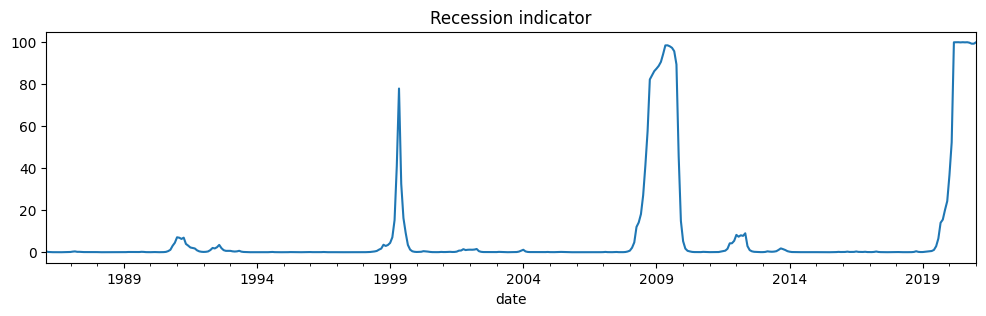

In [2]:
import numpy as np

# Calculate the ratio series
prob_0 = res.smoothed_marginal_probabilities[1]


ratios = []
for t in range(len(prob_0) - 1):
    ratio = prob_0[t]*100 / max(prob_0)
    ratios.append(ratio)

# Create a new DataFrame to store the ratios
date_range_ratios = pd.date_range(start='1986-02', end='2021-02', freq='M')
df_ratios = pd.DataFrame({'date': date_range_ratios, 'ratio': ratios})
df_ratios.set_index('date', inplace=True)

# Plot the ratio series
df_ratios['ratio'].plot(title="Recession indicator", figsize=(12, 3))
plt.show()


We can also easily find out that the recession starts from 2019 is even stronger than the signal starts from 2008 as the signals stays at peak for about 2 years and there is no sign for it to get weakened. The recession  of 2008 crisis only shortly reached the peak and decreased in a few months.  
Covid and Brexit brought really severe harm to UK economy..